In [10]:
my_tif = 'BlueMtHearthforShawnJeff.tif'

In [2]:
#https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html#clip-a-geotiff-with-shapefile
import gdal

# open dataset
ds = gdal.Open('BlueMtHearthforShawnJeff.tif')
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount
print(cols, rows, bands)
ds = None

1452 1091 1


In [3]:
from osgeo import ogr

daShapefile = r"CharcoalHearthsforJeffShawn.shp"

dataSource = ogr.Open(daShapefile)
daLayer = dataSource.GetLayer(0)
layerDefinition = daLayer.GetLayerDefn()


for i in range(layerDefinition.GetFieldCount()):
    print(layerDefinition.GetFieldDefn(i).GetName())
print("Name  -  Type  Width  Precision")
for i in range(layerDefinition.GetFieldCount()):
    fieldName =  layerDefinition.GetFieldDefn(i).GetName()
    fieldTypeCode = layerDefinition.GetFieldDefn(i).GetType()
    fieldType = layerDefinition.GetFieldDefn(i).GetFieldTypeName(fieldTypeCode)
    fieldWidth = layerDefinition.GetFieldDefn(i).GetWidth()
    GetPrecision = layerDefinition.GetFieldDefn(i).GetPrecision()

    print(fieldName + " - " + fieldType+ " " + str(fieldWidth) + " " + str(GetPrecision))

id
Version
HLL
BPC1
Confirmed
FieldConf
FConfDate
Notes
Name  -  Type  Width  Precision
id - Integer64 10 0
Version - String 254 0
HLL - String 254 0
BPC1 - String 254 0
Confirmed - String 254 0
FieldConf - String 11 0
FConfDate - Date 10 0
Notes - String 250 0


C:\Users\User\.conda\envs\coalh\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


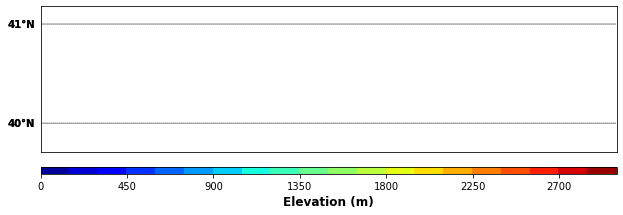

In [19]:
#Thanks
#https://podaac.jpl.nasa.gov/forum/viewtopic.php?f=5&t=657
    
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import osr
import numpy as np
import math

#Plot setup
fig= plt.figure(figsize=(10,8))

ax = plt.subplot(111,aspect = 'equal')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)

#Map setup
map = Basemap(resolution='f', projection='cyl', llcrnrlon=-74.72, llcrnrlat=39.71, urcrnrlon=-80.53, urcrnrlat=41.18)

parallels = np.arange(-50,50,1.)
meridians = np.arange(0,360,1)

map.drawparallels(parallels,labels=[1,0,0,0],color='w', fontsize=10, fontweight='bold')
meri = map.drawmeridians(meridians,labels=[0,0,0,1],color='w', fontsize=10, fontweight='bold')

#Load colormap and setup elevation contour levels
cmap=plt.get_cmap("jet")
clevs = np.linspace(0, 3000, 21)

# Load GeoTiff data
raster = my_tif
ds = gdal.Open(raster)

#Get the dimentions of column and row
nc   = ds.RasterXSize
nr   = ds.RasterYSize

#Read elevation data
data = ds.ReadAsArray()

#Get Longitude and Latitude info
geotransform = ds.GetGeoTransform()
xOrigin      = geotransform[0]
yOrigin      = geotransform[3]
pixelWidth   = geotransform[1]
pixelHeight  = geotransform[5]

#Generate Longitude and Latitude array
lons = xOrigin + np.arange(0, nc)*pixelWidth
lats = yOrigin + np.arange(0, nr)*pixelHeight

#Contour plot
x, y = map(*np.meshgrid(lons, lats))

cs=map.contourf(x, y, data, clevs, cmap=cmap)

map.drawparallels(parallels,labels=[1,0,0,0],color='k', fontsize=10, fontweight='bold')
meri = map.drawmeridians(meridians,labels=[0,0,0,1],color='k', fontsize=10, fontweight='bold')

cb = map.colorbar(cs, 'bottom', size='5%', pad='10%')

cb.set_label('Elevation (m)', fontsize=12, fontweight='bold')
cb.ax.tick_params(labelsize=10)

plt.show()

In [9]:
import georaster
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8,8))

m = Basemap(projection='lcc', lon_0=67.5, lat_0=-68.5, \
            height=950000, width=580000, resolution='h')

m.drawcoastlines()
m.fillcontinents(color='beige')

image = georaster.SingleBandRaster( my_tif, latlon=False)
plt.imshow(image.r, extent=image.extent, zorder=10, alpha=0.6)

plt.show()

ModuleNotFoundError: No module named 'georaster'

C:\Users\User\.conda\envs\coalh\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


[[-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.32482128e+01
   1.35184994e+01  1.46214914e+01]
 [-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.51718483e+01
   1.55414362e+01  1.61091328e+01]
 [-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.68757153e+01
   1.68583088e+01  1.70821323e+01]
 ...
 [ 1.10204153e+01  1.06647882e+01  1.01040573e+01 ...  8.86570549e+00
   8.89857197e+00  8.89676857e+00]
 [ 1.06685486e+01  1.00686617e+01  9.40919971e+00 ...  8.80912685e+00
   8.98118973e+00  8.71203041e+00]
 [ 1.09707537e+01  1.03351965e+01  9.49819756e+00 ...  9.43806934e+00
   1.05522633e+01  9.35869694e+00]]


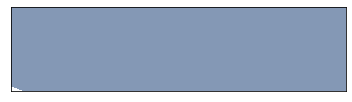

In [16]:

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

-80.53, 39.71, -74.72, 41.18

map = Basemap(resolution='f', projection='cyl', llcrnrlon=-74.72, llcrnrlat=39.71, urcrnrlon=-80.53, urcrnrlat=41.18)
#map = Basemap(projection='tmerc', 
#              lat_0=0, lon_0=3,
#              llcrnrlon=74, 
#              llcrnrlat=39, 
#              urcrnrlon=81, 
#              urcrnrlat=43)

ds = gdal.Open(my_tif)
elevation = ds.ReadAsArray()
print(elevation)
#map.imshow(plt.imread('../sample_files/orthophoto.jpg'))

map.imshow(elevation, cmap = plt.get_cmap('Blues'), alpha = 0.5)

plt.show()

In [4]:
import xarray as xr
from affine import Affine
da = xr.open_rasterio(my_tif)
print (da)
transform = Affine.from_gdal(*da.attrs['transform']) # this is important to retain the geographic attributes from the file

<xarray.DataArray (band: 1, y: 1091, x: 1452)>
[1584132 values with dtype=float32]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 1.62e+05 1.62e+05 1.62e+05 ... 1.609e+05 1.609e+05
  * x        (x) float64 7.716e+05 7.716e+05 7.716e+05 ... 7.731e+05 7.731e+05
Attributes:
    transform:      (1.000314807162534, 0.0, 771613.579, 0.0, -1.000309165902...
    crs:            +init=epsg:32129
    res:            (1.000314807162534, 1.0003091659028274)
    is_tiled:       0
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area


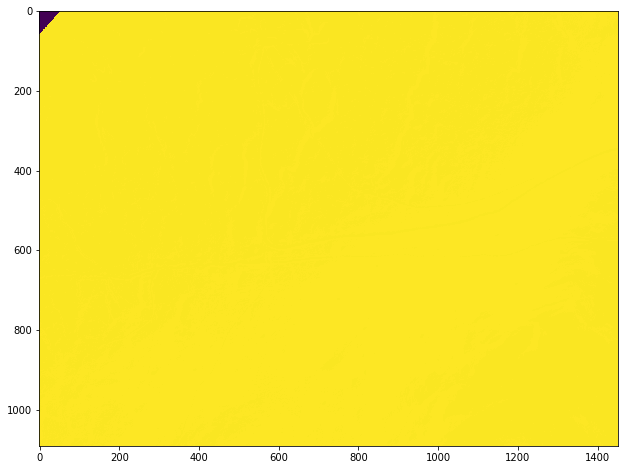

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
plt.show()

In [13]:
print(da.variable.data[0])

[[-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.32482128e+01
   1.35184994e+01  1.46214914e+01]
 [-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.51718483e+01
   1.55414362e+01  1.61091328e+01]
 [-9.99900000e+03 -9.99900000e+03 -9.99900000e+03 ...  1.68757153e+01
   1.68583088e+01  1.70821323e+01]
 ...
 [ 1.10204153e+01  1.06647882e+01  1.01040573e+01 ...  8.86570549e+00
   8.89857197e+00  8.89676857e+00]
 [ 1.06685486e+01  1.00686617e+01  9.40919971e+00 ...  8.80912685e+00
   8.98118973e+00  8.71203041e+00]
 [ 1.09707537e+01  1.03351965e+01  9.49819756e+00 ...  9.43806934e+00
   1.05522633e+01  9.35869694e+00]]


In [30]:
#https://medium.com/the-barometer/read-and-plot-geotiff-in-python-xarray-cartopy-fd48faf1c503
# Imports
import xarray as xr
from affine import Affine
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

# Read the data
da = xr.open_rasterio(my_tif)
transform = Affine.from_gdal(*da.attrs['transform'])

print(da.attrs['transform'])
# Define extents
#llcrnrlon=-74.72, llcrnrlat=39.71, urcrnrlon=-80.53, urcrnrlat=41.18
lat_min = 39.71
lat_max = 41.18
lon_min = 74.72
lon_max = 80.53

# Define the projection
crs=ccrs.PlateCarree()

(1.000314807162534, 0.0, 771613.579, 0.0, -1.0003091659028274, 161967.0647)


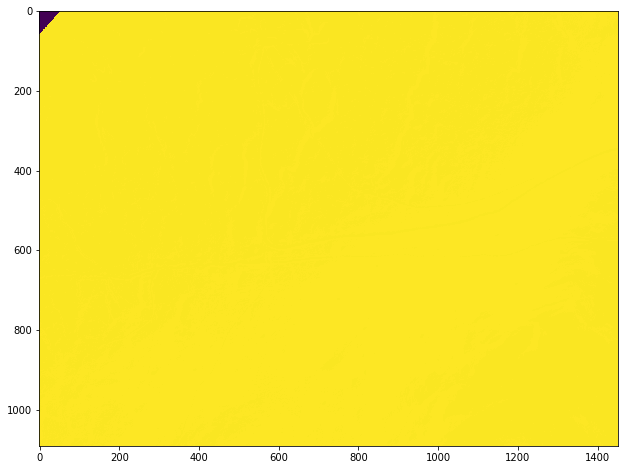

In [31]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
plt.show()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  after removing the cwd from sys.path.


Frozen({'band': 1, 'y': 1091, 'x': 1452})
| 0.00, 771613.58, 1.00|
|-1.00, 161967.06, 0.00|
| 0.00, 0.00, 1.00|


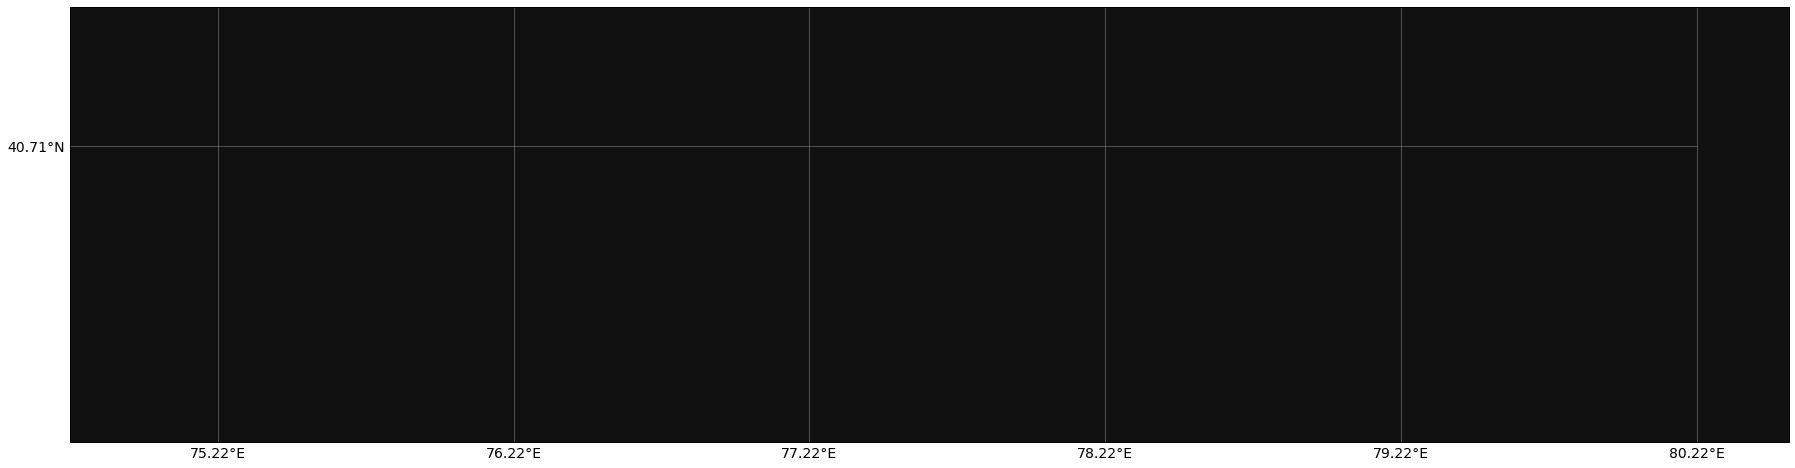

In [32]:

# Create meshgrid from geotiff
nx, ny = da.sizes['x'], da.sizes['y']
x, y = np.meshgrid(np.arange(nx), np.arange(ny)) * transform
print(da.sizes)
print(transform)
# Plot!
fig = plt.figure(figsize=(32,8))
#fig = plt.figure()
ax = fig.add_subplot(111, projection=crs)
#ax.coastlines(resolution='10m', alpha=0.1)
ax.contourf(x, y, da.variable.data[0], cmap='Greys')
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.xlabels_top = None
gl.ylabels_right = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlocator = mticker.FixedLocator(xgrid.tolist())
gl.ylocator = mticker.FixedLocator(ygrid.tolist())
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
plt.show()

In [33]:
#https://ocefpaf.github.io/python4oceanographers/blog/2015/03/02/geotiff/
from osgeo import gdal, osr

gdal.UseExceptions()


fname = my_tif

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

PROJCS["NAD83 / Pennsylvania South",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["standard_parallel_1",40.96666666666667],
    PARAMETER["standard_parallel_2",39.93333333333333],
    PARAMETER["latitude_of_origin",39.33333333333334],
    PARAMETER["central_meridian",-77.75],
    PARAMETER["false_easting",600000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    AUTHORITY["EPSG","32129"]]


In [34]:
import cartopy.crs as ccrs


projcs = inproj.GetAuthorityCode('PROJCS')
projection = ccrs.epsg(projcs)
print(projection)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


_EPSGProjection(32129)


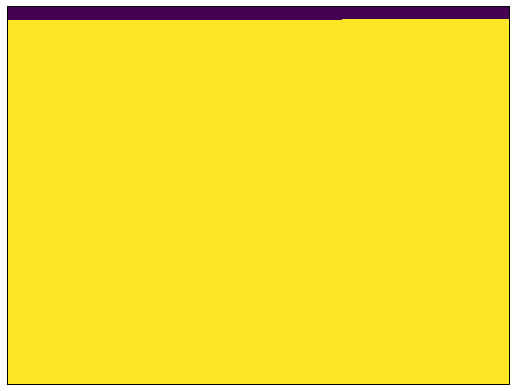

In [57]:
import matplotlib.pyplot as plt

subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :].transpose((1,0)), extent=extent, origin='upper')

In [49]:
data[3,1]

-9999.0

In [ ]:
#Thanksfrom osgeo import gdal

filepath = r"LandsatData/LC81910182016153LGN00_sr_band4.tif"

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)
#https://gis.stackexchange.com/questions/182489/find-rectangle-around-point-with-python
from math import sqrt,atan,pi
import pyproj
geod = pyproj.Geod(ellps='WGS84')

width = 10000. # m
height = 20000. # m
rect_diag = sqrt( width**2 + height**2 )

center_lon = -78.6389
center_lat = 35.7806

azimuth1 = atan(width/height)
azimuth2 = atan(-width/height)
azimuth3 = atan(width/height)+pi # first point + 180 degrees
azimuth4 = atan(-width/height)+pi # second point + 180 degrees

pt1_lon, pt1_lat, _ = geod.fwd(center_lon, center_lat, azimuth1*180/pi, rect_diag)
pt2_lon, pt2_lat, _ = geod.fwd(center_lon, center_lat, azimuth2*180/pi, rect_diag)
pt3_lon, pt3_lat, _ = geod.fwd(center_lon, center_lat, azimuth3*180/pi, rect_diag)
pt4_lon, pt4_lat, _ = geod.fwd(center_lon, center_lat, azimuth4*180/pi, rect_diag)

wkt_point = 'POINT (%.6f %.6f)' % (center_lon, center_lat)
wkt_poly = 'POLYGON (( %.6f %.6f, %.6f %.6f, %.6f %.6f, %.6f %.6f, %.6f %.6f ))' % (pt1_lon, pt1_lat, pt2_lon, pt2_lat, pt3_lon, pt3_lat, pt4_lon, pt4_lat, pt1_lon, pt1_lat)

In [58]:
https://automating-gis-processes.github.io/2016/Lesson7-read-raster.html
from osgeo import gdal

filepath = my_tif

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

In [59]:
# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize
raster.RasterYSize

# Number of bands
raster.RasterCount

# Metadata for the raster dataset
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [60]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)

# Check type of the variable 'band'
type(band)

# Data type of the values
gdal.GetDataTypeName(band.DataType)

'Float32'

In [61]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

Statistics computed.
[ NO DATA VALUE ] =  -9999.0
[ MIN ] =  0.0
[ MAX ] =  50.953983306885


In [62]:
# Read raster data as numeric array from GDAL Dataset
rasterArray = raster.ReadAsArray()

In [63]:
#Check the datatype of variables
type(rasterArray)
type(raster)

osgeo.gdal.Dataset

In [64]:
from osgeo import gdal_array

# Read raster data as numeric array from file
rasterArray = gdal_array.LoadFile(filepath)

In [65]:
rasterArray.min()

-9999.0

In [66]:
import numpy as np

# Get nodata value from the GDAL band object
nodata = band.GetNoDataValue()

#Create a masked array for making calculations without nodata values
rasterArray = np.ma.masked_equal(rasterArray, nodata)
type(rasterArray)

# Check again array statistics
rasterArray.min()

0.0

In [19]:
# Import necessary modules
In [1]: import geopandas as gpd

# Set filepath (fix path relative to yours)
In [2]: fp = "CharcoalHearthsforJeffShawn.shp"

# Read file using gpd.read_file()
In [3]: data = gpd.read_file(fp)

In [20]:
In [4]: type(data)

geopandas.geodataframe.GeoDataFrame

In [21]:
In [5]: data.head()

,id,Version,HLL,BPC1,Confirmed,FieldConf,FConfDate,Notes,geometry
0,1444,postLAS,recognized,notrecognized,nohearth,None,None,None,POINT (-75.63910 40.78129)
1,1445,postLAS,recognized,notrecognized,nohearth,None,None,None,POINT (-75.63991 40.78055)
2,1448,postLAS,recognized,notrecognized,nohearth,None,None,None,POINT (-75.63311 40.77632)
3,1451,postLAS,recognized,notrecognized,nohearth,None,None,None,POINT (-75.65063 40.78119)
4,1453,postLAS,recognized,notrecognized,nohearth,None,None,None,POINT (-75.65977 40.78466)


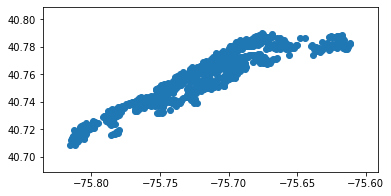

In [79]:
In [6]: data.plot();

In [80]:
In [7]: data.crs

{'init': 'epsg:4326'}

In [81]:
In [8]: data['geometry'].head()

0    POINT (-75.63910 40.78129)
1    POINT (-75.63991 40.78055)
2    POINT (-75.63311 40.77632)
3    POINT (-75.65063 40.78119)
4    POINT (-75.65977 40.78466)
Name: geometry, dtype: geometry

In [82]:
from shapely.geometry import Point, Polygon
# Create a Polygon
lat_min = 39.71
lat_max = 41.18
lon_min = -74.72
lon_max = -80.53

(-75.71725268214374, 40.764397146754874, 0.0)
(-75.71695514265, 40.774222278709765, 0.0)
(-75.70005461271417, 40.76409483152501, 0.0)
(-75.69975455768758, 40.773919920041344, 0.0)



coords = [(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]
poly = Polygon(coords)

selection = data[0:]
for index, row in selection.iterrows():
    pt = row['geometry']
    print(pt, pt.within(poly))


POINT (-75.6390990093211 40.7812930679397) True
POINT (-75.6399088060172 40.7805505930084) True
POINT (-75.6331109042341 40.7763246074975) True
POINT (-75.6506319045869 40.7811850217306) True
POINT (-75.6597689480312 40.7846627285828) True
POINT (-75.6559431464716 40.7742743166269) True
POINT (-75.6697413551685 40.7868073197292) True
POINT (-75.66810127523451 40.7878235487317) True
POINT (-75.67210389202531 40.7870354541243) True
POINT (-75.6718436705744 40.7868073197292) True
POINT (-75.6832489028499 40.7855616402609) True
POINT (-75.6915622934128 40.7846931506371) True
POINT (-75.6802049966676 40.7880763073567) True
POINT (-75.67579150390171 40.7890445584188) True
POINT (-75.6682758975239 40.7891314022017) True
POINT (-75.6859709561849 40.7836068744946) True
POINT (-75.70921284050969 40.7754579406692) True
POINT (-75.6769916041455 40.7680003884539) True
POINT (-75.67812408105191 40.7694026329317) True
POINT (-75.67769779722769 40.7720786789663) True
POINT (-75.6792043424697 40.773615

POINT (-75.72462644175241 40.759741812922) True
POINT (-75.7233935545721 40.7596390723237) True
POINT (-75.7220184111785 40.7605163189713) True
POINT (-75.71094098993019 40.7652976399723) True
POINT (-75.708749860922 40.7652423219267) True
POINT (-75.7105340659716 40.7667516978013) True
POINT (-75.7105862357099 40.7680081678013) True
POINT (-75.71254781786961 40.7660404778381) True
POINT (-75.71307994920009 40.7669018432649) True
POINT (-75.7138103255362 40.7659851604108) True
POINT (-75.71612666191631 40.7645389884755) True
POINT (-75.716043190335 40.7650684649122) True
POINT (-75.7171283208915 40.765526814242) True
POINT (-75.71521890847001 40.7665225277554) True
POINT (-75.7052127526659 40.7726229229206) True
POINT (-75.7056822803106 40.7712796197386) True
POINT (-75.7071117311397 40.7727177432955) True
POINT (-75.7186596506606 40.7659481535623) True
POINT (-75.7177155052551 40.7633925728894) True
POINT (-75.7183346169964 40.7637970176604) True
POINT (-75.7190311177054 40.7623902426

POINT (-75.78540484919867 40.72551190452945) True


In [100]:
from osgeo import gdal
ds = gdal.Open(my_tif)
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3] 

In [101]:
print(minx,maxx,miny,maxy)

771613.579 773066.0361 160875.7274 161967.0647


In [231]:
def wgs84_to_modissinu ( lon, lat ):
    wgs84 = osr.SpatialReference( )
    wgs84.ImportFromEPSG( 4326 )
    modis_sinu = osr.SpatialReference() 
    modis_sinu.ImportFromProj4 ( "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs" )
    tx = osr.CoordinateTransformation(wgs84, modis_sinu)
    modis_x, modis_y, modis_z = tx.TransformPoint ( lon, lat )
    return modis_x, modis_y, modis_z 


In [ ]:
***** Move it down!!!

In [232]:
This is being re-written above 


# https://gis.stackexchange.com/questions/129847/obtain-coordinates-and-corresponding-pixel-values-from-geotiff-using-python-gdal
#    #open raster layer
src_ds=gdal.Open(my_tif) 
gt=src_ds.GetGeoTransform()

print("gt",gt)
rb=src_ds.GetRasterBand(1)

#Get the dimentions of column and row
nc   = src_ds.RasterXSize
nr   = src_ds.RasterYSize

xOrigin      = gt[0]
yOrigin      = gt[3]
pixelWidth   = gt[1]
pixelHeight  = gt[5]

#Generate Longitude and Latitude array
lons = xOrigin + np.arange(0, nc)*pixelWidth
lats = yOrigin + np.arange(0, nr)*pixelHeight


gdal.UseExceptions() #so it doesn't print to screen everytime point is outside grid
print(src_ds)






# Define the source projection, WGS84 lat/lon. 
nad83_1 = osr.SpatialReference( ) # Define a SpatialReference object
nad83_1.ImportFromEPSG(7019) # And set it to WGS84 using the EPSG code

# Now for the target projection, MODIS sinusoidal
modis_sinu = osr.SpatialReference() # define the SpatialReference object
# In this case, we get the projection from a Proj4 string
modis_sinu.ImportFromProj4 ("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")

# Now, we define a coordinate transformtion object, *from* wgs84 *to* modis_sinu
tx = osr.CoordinateTransformation( nad83_1, modis_sinu )

#lyr=src_ds.GetLayer(0)

#for feat in lyr:
#    geom=feat.GetGeometryRef()
#    mx=geom.Centroid().GetX()
#    my=geom.Centroid().GetY()

#    px = int((mx - gt[0]) / gt[1]) #x pixel
#    py = int((my - gt[3]) / gt[5]) #y pixel
        
        
# Make annotation file for the jpeg from polygons
for index, row in hearth_data_poly.iterrows():
    poly = row['geometry']
    #print(row, row['id'])
    print(poly)
    
    boundary = poly.bounds
    print(boundary[0])
    print(boundary[1])
    print(boundary[2])
    print(boundary[3])
    pt1_coords = [(boundary[0], boundary[1])]
    pt2_coords = [(boundary[2], boundary[3])]
    pt1 = Point(pt1_coords)
    print(pt1)
    lon = boundary[0]
    lat = boundary[1]
    #lon = float ( lon )
    #lat = float ( lat )
    #lon = -4.025
    #lat= 56.59
    # Actually do the transformation using the TransformPoint method
    print("lon,lat",lon, lat)
    modis_x, modis_y,modis_z = wgs84_to_modissinu ( lon,lat )    
    
    print("origin",xOrigin, yOrigin)
    print("modis",modis_x, modis_y)
    #https://jgomezdans.github.io/gdal_notes/first_steps.html
    pixel_x = (modis_x - xOrigin)*pixelWidth    
    
    # The difference in distance between the UL corner (geot[0] \
    # and point of interest. Scaled by geot[1] to get pixel number
    pixel_y = (modis_y - yOrigin)*pixelHeight
    #In [55]: pixel_x
    #Out[55]: 2132.115490094644 # A real number, not an integer!
    print("pixels",pixel_x, pixel_y)
    #In [59]: pixel_y = (5936117.4 - geot[3])/(geot[5]) # Like for pixel_x, \
        #but in vertical direction. Note the different elements of geot \
        #being used
    
    
    #for i in range(0, poly.GetPointCount()):
    # GetPoint returns a tuple not a Geometry
#        pt = poly.GetPoint(i)
 #       print ("%i). POINT (%d %d)" %(i, pt[0], pt[1]))
    #select only points inside the bounds of the geotiff AND are confirmed to be hearths
    #if(pt.within(poly)==True):
#        if(row['Confirmed']=='hearth'):
 #           print(pt, pt.within(poly))

gt (771613.579, 1.000314807162534, 0.0, 161967.0647, 0.0, -1.0003091659028274)
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000020CE00AC0F0> >
POLYGON ((-75.7128140898394 40.771356587287, -75.7128140898394 40.771535602887, -75.7126350742394 40.771535602887, -75.7126350742394 40.771356587287, -75.7128140898394 40.771356587287))
-75.7128140898394
40.771356587287
-75.7126350742394
40.771535602887
POINT (-75.7128140898394 40.771356587287)
lon,lat -75.7128140898394 40.771356587287
origin 771613.579 161967.0647
modis -6375807.64151884 4533573.114882005
pixels -7149671.279912706 -4372957.601713316
POLYGON ((-75.7113028366434 40.7691008470052, -75.7113028366434 40.7692798626052, -75.7111238210434 40.7692798626052, -75.7111238210434 40.7691008470052, -75.7113028366434 40.7691008470052))
-75.7113028366434
40.7691008470052
-75.7111238210434
40.769279862605195
POINT (-75.7113028366434 40.7691008470052)
lon,lat -75.7113028366434 40.7691008470052
origin 771613.579 1

# Save a shapefile with just the points inside the geotiff and confirmed hearths

In [24]:
# Import necessary modules
import geopandas as gpd

# Set filepath (fix path relative to yours)
fp = "CharcoalHearthsforJeffShawn.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)
    

#https://stackoverflow.com/questions/2922532/obtain-latitude-and-longitude-from-a-geotiff-file
from osgeo import osr, gdal

# get the existing coordinate system
ds = gdal.Open(my_tif)

old_cs= osr.SpatialReference()

old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
nad83_wkt = """
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]]"""


#GEOGCS["WGS 84",
#    DATUM["WGS_1984",
#        SPHEROID["WGS 84",6378137,298.257223563,
#            AUTHORITY["EPSG","7030"]],
#        AUTHORITY["EPSG","6326"]],
#    PRIMEM["Greenwich",0,
#        AUTHORITY["EPSG","8901"]],
#    UNIT["degree",0.01745329251994328,
#        AUTHORITY["EPSG","9122"]],
#    AUTHORITY["EPSG","4326"]]"""


new_cs = osr.SpatialReference()
#new_cs .ImportFromWkt(wgs84_wkt)
new_cs .ImportFromWkt(nad83_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

#get the coordinates in lat long
latlong1 = transform.TransformPoint(minx,miny)
print(latlong1)
latlong2 = transform.TransformPoint(minx,maxy)
print(latlong2)
latlong3 = transform.TransformPoint(maxx,maxy)
print(latlong3)
latlong4 = transform.TransformPoint(maxx,miny)
print(latlong4)

(-75.71725268214374, 40.764397146754874, 0.0)
(-75.71695514265, 40.774222278709765, 0.0)
(-75.69975455768758, 40.773919920041344, 0.0)
(-75.70005461271417, 40.76409483152501, 0.0)


In [58]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona


from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
polydata = gpd.GeoDataFrame()
polydata['geometry'] = None

# Create a Polygon
coords = [(latlong1[0], latlong1[1]), (latlong2[0], latlong2[1]), (latlong3[0], latlong3[1]), (latlong4[0], latlong4[1])]
poly = Polygon(coords)
polydata.loc[0, 'geometry'] = poly
polydata.loc[0, 'id'] = 0
print(polydata)
#newdata = newdata.append(poly, ignore_index=True)
# Determine the output path for the Shapefile
outfp = r"just_this_geotiff_border.shp"

# Write the data into that Shapefile
polydata.to_file(outfp)

print("1")
# Create an empty geopandas GeoDataFrame
hearth_data = gpd.GeoDataFrame()
hearth_data['geometry'] = None

nohearth_data = gpd.GeoDataFrame()
nohearth_data['geometry'] = None

# Create an empty geopandas GeoDataFrame
hearth_data_poly = gpd.GeoDataFrame()
hearth_data_poly['geometry'] = None


selection = data[0:]

for index, row in selection.iterrows():
    pt = row['geometry']
    #print(row)
    #select only points inside the bounds of the geotiff AND are confirmed to be hearths
    if(pt.within(poly)==True):
        if(row['Confirmed']=='hearth'):
            print(pt, pt.within(poly))
            hearth_data = hearth_data.append(row, ignore_index=True)
            
            polygon_half_size = 0.0000895078
            polygon_half_size = 0.0001745402
            #get the coordinates in lat long
            # pp_ = point_poly - the polygon around the points
            pp_minx=pt.bounds[0]-polygon_half_size
            print(pt.bounds[0])
            print(pp_minx)
            pp_maxx=pt.bounds[0]+polygon_half_size
            pp_miny=pt.bounds[1]-polygon_half_size
            pp_maxy=pt.bounds[1]+polygon_half_size
            
            pp_latlong1 = transform.TransformPoint(pp_minx,pp_miny)
            #print(latlong1)
            pp_latlong2 = transform.TransformPoint(pp_minx,pp_maxy)
            #print(latlong2)
            pp_latlong3 = transform.TransformPoint(pp_maxx,pp_maxy)
            #print(latlong3)
            pp_latlong4 = transform.TransformPoint(pp_maxx,pp_miny)
            #print(latlong4)
            # Create a Polygon
            pp_coords = [(pp_minx, pp_miny), (pp_minx, pp_maxy), (pp_maxx, pp_maxy), (pp_maxx, pp_miny)]
            #pp_coords = [(pp_minx, pp_latlong1[1]), (pp_minx, pp_latlong2[1]), (pp_latlong3[0], pp_latlong3[1]), (pp_latlong4[0], pp_latlong4[1])]
            print("pp_coords")
            print(pp_coords)
            ppoly = Polygon(pp_coords)
            new_pp_row = {'id':row['id'], 'geometry':ppoly}
            #hearth_data_poly.loc[0, 'geometry'] = ppoly
            #hearth_data_poly.loc[0, 'id'] = row['id']
            hearth_data_poly = hearth_data_poly.append(new_pp_row, ignore_index=True)
        if(row['Confirmed']=='nohearth'):
            print(pt, pt.within(poly))
            nohearth_data = nohearth_data.append(row, ignore_index=True)

            
#print("-----------------------------------")
#print(latlong1,latlong4)
#selection = data[0:]
#for index, row in selection.iterrows():
#    pt = row['geometry']
#    if(pt.bounds[0]>=latlong1[0] and pt.bounds[0]<=latlong4[0] and pt.bounds[1]>=latlong1[1] and pt.bounds[1]<=latlong4[1]):
#        print(pt, pt.within(poly))
#        print(pt.bounds[0])
#        #newdata = newdata.append(row, ignore_index=True)

                                            geometry   id
0  POLYGON ((-75.71725 40.76440, -75.71696 40.774...  0.0
1
POINT (-75.7164126219127 40.7698866061231) True
POINT (-75.7152227935679 40.7679586074166) True
POINT (-75.7052801866637 40.7686163366065) True
POINT (-75.7114305761953 40.7712246785996) True
POINT (-75.7127245820394 40.771446095087) True
-75.7127245820394
-75.7128991222394
pp_coords
[(-75.7128991222394, 40.771271554887), (-75.7128991222394, 40.771620635287), (-75.71255004183939, 40.771620635287), (-75.71255004183939, 40.771271554887)]
POINT (-75.7112133288434 40.7691903548052) True
-75.7112133288434
-75.7113878690434
pp_coords
[(-75.7113878690434, 40.7690158146052), (-75.7113878690434, 40.7693648950052), (-75.71103878864339, 40.7693648950052), (-75.71103878864339, 40.7690158146052)]
POINT (-75.713079390564 40.7690658845272) True
-75.713079390564
-75.71325393076401
pp_coords
[(-75.71325393076401, 40.7688913443272), (-75.71325393076401, 40.7692404247272), (-75.7129048503

-75.7041956526038
-75.70437019280381
pp_coords
[(-75.70437019280381, 40.7711013313683), (-75.70437019280381, 40.7714504117683), (-75.7040211124038, 40.7714504117683), (-75.7040211124038, 40.7711013313683)]
POINT (-75.70613521870671 40.7734045300144) True
-75.7061352187067
-75.70630975890671
pp_coords
[(-75.70630975890671, 40.7732299898144), (-75.70630975890671, 40.7735790702144), (-75.7059606785067, 40.7735790702144), (-75.7059606785067, 40.7732299898144)]
POINT (-75.7024817019872 40.7659524186271) True
-75.7024817019872
-75.7026562421872
pp_coords
[(-75.7026562421872, 40.7657778784271), (-75.7026562421872, 40.7661269588271), (-75.70230716178719, 40.7661269588271), (-75.70230716178719, 40.7657778784271)]
POINT (-75.7001506238348 40.7678622079079) True
-75.7001506238348
-75.70032516403481
pp_coords
[(-75.70032516403481, 40.767687667707904), (-75.70032516403481, 40.7680367481079), (-75.6999760836348, 40.7680367481079), (-75.6999760836348, 40.767687667707904)]
POINT (-75.7057718196295 40.

In [59]:
print("*** hearth_data")
print(hearth_data)
print("*** nohearth_data")
print(nohearth_data)
print("*** hearth_data_poly")
print(hearth_data_poly)

*** hearth_data
                      geometry           BPC1 Confirmed   FConfDate FieldConf  \
0   POINT (-75.71272 40.77145)  notrecognized    hearth  2016-10-16       yes   
1   POINT (-75.71121 40.76919)  notrecognized    hearth  2016-10-16       yes   
2   POINT (-75.71308 40.76907)  notrecognized    hearth        None      None   
3   POINT (-75.71397 40.76799)  notrecognized    hearth        None      None   
4   POINT (-75.71635 40.76863)  notrecognized    hearth        None      None   
5   POINT (-75.70892 40.76918)  notrecognized    hearth        None      None   
6   POINT (-75.71711 40.76451)  notrecognized    hearth  2020-01-26       yes   
7   POINT (-75.71176 40.76784)     recognized    hearth        None      None   
8   POINT (-75.70736 40.77004)     recognized    hearth        None      None   
9   POINT (-75.70781 40.77214)     recognized    hearth        None      None   
10  POINT (-75.70037 40.77198)     recognized    hearth        None      None   
11  POINT (-

In [60]:
# Determine the output path for the Shapefile
outfp = r"this_geotiff_hearth.shp"
# Write the data into that Shapefile
hearth_data.to_file(outfp)


# Determine the output path for the Shapefile
outfp = r"this_geotiff_nohearth.shp"
# Write the data into that Shapefile
nohearth_data.to_file(outfp)


# Determine the output path for the Shapefile
outfp = r"this_geotiff_hearth_poly.shp"
# Write the data into that Shapefile
hearth_data_poly.to_file(outfp)

# Save .tif as .jpg

In [177]:

import numpy as np
ds = gdal.Open(my_tif)
#geoTrans = srcImage.GetGeoTransform()

band = ds.GetRasterBand(1)
width = ds.RasterXSize
height = ds.RasterYSize

data = band.ReadAsArray(0, 0, width, height)
#convert all the bad data
data[data==-9999.0] = 0
max_value = numpy.max(data)
color_multiplier = 255/(max_value-1)
print(color_multiplier)
data = data*color_multiplier
print(data)
data_int = np.array(data, dtype='int')
print(data_int)
#clip = ds.readasarray(ds)
data_int = data_int.astype(gdalnumeric.uint8)

gdalnumeric.SaveArray(data_int, "BlueMtHearthforShawnJeff.jpg", format="JPEG")

5.104698026450582
[[ 0.        0.        0.       ... 67.62813  69.00786  74.6383  ]
 [ 0.        0.        0.       ... 77.44771  79.33434  82.23226 ]
 [ 0.        0.        0.       ... 86.14543  86.05658  87.19913 ]
 ...
 [56.255894 54.440525 51.578163 ... 45.256752 45.424522 45.415318]
 [54.45972  51.39748  48.031124 ... 44.967934 45.846264 44.472286]
 [56.002388 52.75806  48.48543  ... 48.178497 53.86612  47.773323]]
[[ 0  0  0 ... 67 69 74]
 [ 0  0  0 ... 77 79 82]
 [ 0  0  0 ... 86 86 87]
 ...
 [56 54 51 ... 45 45 45]
 [54 51 48 ... 44 45 44]
 [56 52 48 ... 48 53 47]]


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000020CDF7A6F90> >

In [256]:
#https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html?highlight=rasterize

In [61]:
def write_annot(obj_type, obj_annots_dir, obj_f_num, org_f_path,org_f_width,org_f_height,org_f_depth, refPts):
    # With credit to: 
    # https://www.geeksforgeeks.org/reading-writing-text-files-python/
    annot_file_path = obj_annots_dir+obj_f_num+'.xml'
    annot_file = open(annot_file_path,"w") 

    annot_file.write("<annotation>\n") 
    annot_file.write("	<folder>"+obj_type+"</folder>\n") 
    annot_file.write("	<filename>"+obj_f_num+".jpg</filename>\n") 
    annot_file.write("	<path>"+org_f_path+"</path>\n") 
    annot_file.write("	<source>\n") 
    annot_file.write("		<database>Muhlenberg_charcoal_hearths</database>\n") 
    annot_file.write("	</source>\n") 
    annot_file.write("	<size>\n") 
    annot_file.write("		<width>"+str(org_f_width)+"</width>\n") 
    annot_file.write("		<height>"+str(org_f_height)+"</height>\n") 
    annot_file.write("		<depth>"+str(org_f_depth)+"</depth>\n") 
    annot_file.write("	</size>\n") 
    annot_file.write("	<segmented>0</segmented>\n") 
    for ocn in range(0,len(refPts)):
        refPt = refPts[ocn]
        refPtMin = refPt[0]
        refPtMax = refPt[1]
        
        #Sometimes the mouse gets dragged from the bottom to the top, etc
        if(refPtMin[1]>refPtMax[1]):
            ytemp = refPtMin[1]
            refPtMin[1] = refPtMax[1]
            refPtMax[1]=ytemp
        if(refPtMin[0]>refPtMax[0]):
            xtemp = refPtMin[0]
            refPtMin[0] = refPtMax[0]
            refPtMax[0]=xtemp 
        
        annot_file.write("	<object>\n") 
        annot_file.write("		<name>"+obj_type+"</name>\n") 
        annot_file.write("		<number>"+str(ocn)+"</number>\n") 
        annot_file.write("		<truncated>0</truncated>\n") 
        annot_file.write("		<difficult>0</difficult>\n") 
        annot_file.write("		<bndbox>\n") 
        annot_file.write("			<xmin>"+str(refPtMin[0])+"</xmin>\n") 
        annot_file.write("			<ymin>"+str(refPtMin[1])+"</ymin>\n") 
        annot_file.write("			<xmax>"+str(refPtMax[0])+"</xmax>\n") 
        annot_file.write("			<ymax>"+str(refPtMax[1])+"</ymax>\n") 
        annot_file.write("		</bndbox>\n") 
        annot_file.write("	</object>\n") 
    annot_file.write("</annotation>\n") 
    annot_file.close()

In [62]:
# note below the Proj4 incantation.
# The words of this spell come from the EPSG definition, visible for the CRS in QGIS
#NAD83 / Pennsylvania South
#Extent
#-80.53, 39.71, -74.72, 41.18
#Proj4
#+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs

#See and Thanks to:
#https://geog0111.readthedocs.io/en/latest/Chapter7_FittingPhenologyModels.html?highlight=Proj4#selecting-data-from-a-raster-file

def convert_coordinates(x_location, y_location,
                       src_transform={'EPSG':4326},
                       dst_transform={'Proj4':"+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"}):
    """A function to convert coordinates from one target coordinate
    representation to another. The input an output transformation can be given
    in either EPSG codes or Proj4 strings, by providing the function with a
    dictionary with the desired convention as a key, and with the relevant
    codes as its only element.

    Parameters
    ----------
    x_location: float
        The x location
    y_location: float
        The y location
    src_transform: dict
        A dictionary with keys either "EPSG" or "Proj4" (anything else throws
        an exception) with the description of the **input** projection
    dst_transform: dict
        A dictionary with keys either "EPSG" or "Proj4" (anything else throws
        an exception) with the description of the **output** projection
    Returns
    --------

    The transformed x and y coordinates"""
    input_coords = osr.SpatialReference()
    # In this case, we use EPSG code
    try:
        input_coords.ImportFromEPSG(src_transform["EPSG"])
    except KeyError:
        input_coords.ImportFromProj4(src_transform["Proj4"])
    except KeyError:
        raise ValueError("src_transform not dictionary with EPSG/Proj4 keys!")


    output_coords = osr.SpatialReference()
    try:
        output_coords.ImportFromEPSG(dst_transform["EPSG"])
    except KeyError:
        output_coords.ImportFromProj4(dst_transform["Proj4"])
    except KeyError:
        raise ValueError("src_transform not dictionary with EPSG/Proj4 keys!")


    transformation = osr.CoordinateTransformation(input_coords,
                                                 output_coords)
    output_x, output_y, output_z = transformation.TransformPoint(x_location,
                                                         y_location)
    return output_x, output_y


##################################################################
# Test function
##################################################################

#x_location, y_location = 43.3623, -8.4115 # In WGS84

#x_location, y_location = -75.7128140898394, 40.771356587287

#print (convert_coordinates(x_location, y_location))

In [63]:
import gdal
def get_pixel(raster, point_x, point_y):
    """Get the pixel for given coordinates (in the raster's convention, not
    checked!) for a raster file.

    Parameters
    ----------
    raster: string
        A GDAL-friendly raster filename
    point_x: float
        The Easting in the same coordinates as the raster (not checked!)
    point_y: float
        The Northing in the same coordinates as the raster (not checked!)

    Returns
    -------
    The row/column (or column/row, depending on how you define it)
    """
    g = gdal.Open(raster)
    if g is None:
        raise ValueError(f"{raster:s} cannot be opened!")
    geoT = g.GetGeoTransform()
    inv_geoT = gdal.InvGeoTransform(geoT)
    r, c = (gdal.ApplyGeoTransform(inv_geoT, point_x, point_y))
    return int(r + 0.5), int(c + 0.5)

##################################################################
# Test function
##################################################################


fname = "/home/plewis/public_html/geog0111_data/lai_files/" + \
              "MCD15A3H.A2016273.h17v04.006.2016278070708.hdf"
gdal_fname = 'HDF4_EOS:EOS_GRID:"%s":MOD_Grid_MCD15A3H:Fpar_500m' % fname

gdal_fname ="BlueMtHearthforShawnJeff.tif"
print (get_pixel(gdal_fname, 771970.4122612458, 161656.97900192798))

(357, 310)


In [64]:
x_location, y_location = -75.7128140898394, 40.771356587287

print (convert_coordinates(x_location, y_location))

gdal_fname ="BlueMtHearthforShawnJeff.tif"
cx,cy=convert_coordinates(x_location, y_location)
print (get_pixel(gdal_fname,cx,cy ))


(771970.4122612458, 161656.97900192798)
(357, 310)


In [65]:
#Modified version - uses a raster already open to save processing
def get_pixel_with_geot(geoT, point_x, point_y):
    """Get the pixel for given coordinates (in the raster's convention, not
    checked!) for a raster file.

    Parameters
    ----------
    geoT: 
        raster.GetGeoTransform()
    point_x: float
        The Easting in the same coordinates as the raster (not checked!)
    point_y: float
        The Northing in the same coordinates as the raster (not checked!)

    Returns
    -------
    The row/column (or column/row, depending on how you define it)
    """
    
    inv_geoT = gdal.InvGeoTransform(geoT)
    r, c = (gdal.ApplyGeoTransform(inv_geoT, point_x, point_y))
    return int(r + 0.5), int(c + 0.5)

In [66]:
# https://gis.stackexchange.com/questions/129847/obtain-coordinates-and-corresponding-pixel-values-from-geotiff-using-python-gdal
#    #open raster layer
src_ds=gdal.Open(my_tif) 
gt=src_ds.GetGeoTransform()
#Get the dimentions of column and row
nc   = src_ds.RasterXSize
nr   = src_ds.RasterYSize
print(nc,nr)
gdal.UseExceptions() #so it doesn't print to screen everytime point is outside grid

refPts = []      
refPt = []
#I'm hoping the tifs will be 1452X1091        
# Make annotation file for the jpeg from polygons
for index, row in hearth_data_poly.iterrows():
    poly = row['geometry']
    #print(row, row['id'])
    #print(poly)
    
    boundary = poly.bounds
    #print(boundary[0])
    #print(boundary[1])
    #print(boundary[2])
    #print(boundary[3])

    lon = boundary[0]
    lat = boundary[1]
    
    print("lon,lat",lon, lat)
        
    cx,cy=convert_coordinates(lon, lat)
    p1x,p1y= (get_pixel_with_geot(gt,cx,cy ))
    
    
    print(p1x,p1y)
    lon = boundary[2]
    lat = boundary[3]
    
    print("lon,lat",lon, lat)
        
    cx,cy=convert_coordinates(lon, lat)
    p2x,p2y= (get_pixel_with_geot(gt,cx,cy ))
    print(p2x,p2y)
    #p2y is smaller than p1y so we'll exchange them to keep p1 as the minimum.
    ptemp=p1y
    p1y=p2y
    p2y=ptemp
    if(p1x<0):
        p1x=0
    if(p1y<0):
        p1y=0
    if(p2x<0):
        p2x=0
    if(p2y<0):
        p2y=0

    if(p1x>nc):
        p1x=nc
    if(p1y>nr):
        p1y=nr
    if(p2x>nc):
        p2x=nc
    if(p2y>nr):
        p2y=nr
     
        
    refPt = [(p1x, p1y)]
    refPt.append((p2x, p2y))
    refPts.append(refPt)

object_type = 'charcoal_hearth_hill'
object_annots_dir = 'C:\\a_orgs\\carleton\\hist3814\\R\\charcoalhearths_data\\'+object_type+'\\annots\\'
write_annot(object_type, object_annots_dir, "BlueMtHearthforShawnJeff", "BlueMtHearthforShawnJeff.jpg",nc,nr,1, refPts)    

1452 1091
lon,lat -75.7128991222394 40.771271554887
350 320
lon,lat -75.71255004183939 40.771620635287
378 280
lon,lat -75.7113878690434 40.7690158146052
483 567
lon,lat -75.71103878864339 40.7693648950052
512 528
lon,lat -75.71325393076401 40.7688913443272
326 584
lon,lat -75.712904850364 40.7692404247272
354 545
lon,lat -75.71414416204361 40.7678125921512
254 706
lon,lat -75.7137950816436 40.7681616725512
282 666
lon,lat -75.7165203947667 40.7684531033677
51 639
lon,lat -75.71617131436669 40.7688021837677
80 600
lon,lat -75.70909894746511 40.7690041455265
676 564
lon,lat -75.7087498670651 40.7693532259265
705 524
lon,lat -75.71728087648171 40.7643398547049
-1 1097
lon,lat -75.7169317960817 40.7646889351049
26 1058
lon,lat -75.71193496439321 40.7676667898064
440 718
lon,lat -75.7115858839932 40.7680158702064
469 678
lon,lat -75.7075349486215 40.769862734408
806 465
lon,lat -75.70718586822149 40.770211814808
835 426
lon,lat -75.7079888311335 40.7719701659898
762 232
lon,lat -75.7076397